In [1]:
import numpy as np
from matplotlib import pyplot as plt

import tinypid

In [2]:
def model(input, previous):
    randomness = 0.2
    current = (
        0.1 * input
        + 0.95 * previous
        - 0.05
        + randomness * np.random.random()
        - 0.5 * randomness
    )
    return current

Text(0.5, 0, 'time')

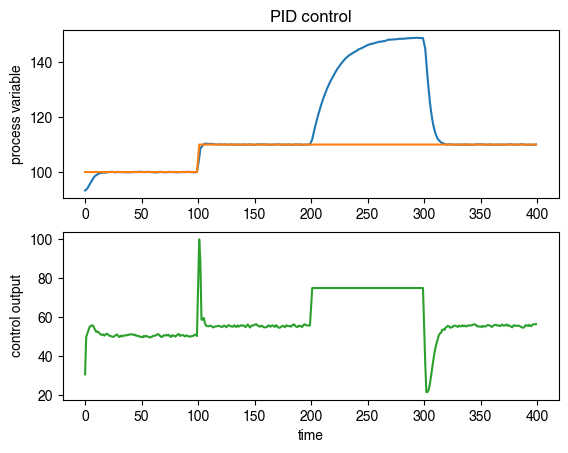

In [4]:
value = model(0, 100)

controller = tinypid.PID(
    setpoint=100,
    K_p=5,
    K_i=1,
    K_d=1,
    derivative_lowpass=0.1,
    upper_limit=100,
    lower_limit=0,
)

values = []
outputs = []
times = []
setpoints = []

for i in range(100):
    output = controller(value)
    value = model(output, value)

    outputs.append(output)
    values.append(value)
    setpoints.append(controller.setpoint)
    times.append(i)

controller.setpoint = 110

for i in range(101, 200):
    output = controller(value)
    value = model(output, value)

    outputs.append(output)
    values.append(value)
    setpoints.append(controller.setpoint)
    times.append(i)

for i in range(201, 300):
    output = controller(value, 75)
    value = model(output, value)

    outputs.append(output)
    values.append(value)
    setpoints.append(controller.setpoint)
    times.append(i)

for i in range(301, 400):
    output = controller(value)
    value = model(output, value)

    outputs.append(output)
    values.append(value)
    setpoints.append(controller.setpoint)
    times.append(i)

fig, axes = plt.subplots(nrows=2)
ax = axes[0]
ax.plot(times, values)
ax.plot(times, setpoints)
ax.set_title("PID control")
ax.set_ylabel("process variable")

ax = axes[1]
ax.plot(times, outputs, color="C2")
ax.set_ylabel("control output")
ax.set_xlabel("time")